In [ ]:
# import librairies

import pandas as pd
import nltk
import numpy as np 
import matplotlib.pyplot as plt
import demoji

# demoji.download_codes()

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import FreqDist


In [ ]:
# importing dataset

data = pd.read_csv("./covid_fake_news-main/english_test_with_labels.csv")
data.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [ ]:
data["label"].value_counts(normalize=True) * 100

## Tweets containing fake news (47%)

In [ ]:
# extracting tweets into one block of text

faketext = data[data["label"] == "fake"]
faketext = faketext["tweet"]
faketext = [l for l in faketext]
faketext = " ".join(faketext)

# tokenize

tokens = word_tokenize(faketext)

# remove stop words

stop_words = set(stopwords.words("english"))

filtered_list = []

for word in tokens:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

# remove punctuation, conjunctions, etc

punctuation = [".", ",", "(", ")", "?", "!", ":", "&", "#", ";", "@", "%", "'s", '’', '``', "''", '�', '”', '“', "n't", "would", '‘', "...", "..", '', "-"]

filtered_no_punc = []

for word in filtered_list:
    if word not in punctuation:
        filtered_no_punc.append(word)

# removing urls

no_url = []

for word in filtered_no_punc:
    if not word.startswith("/") and word != "https":
        no_url.append(word)

# change to lowercase

no_url = [word.lower() for word in no_url]

test = " ".join(no_url)

another = demoji.replace(test, "")

demoji.findall(another)

no_url = another.split(" ")


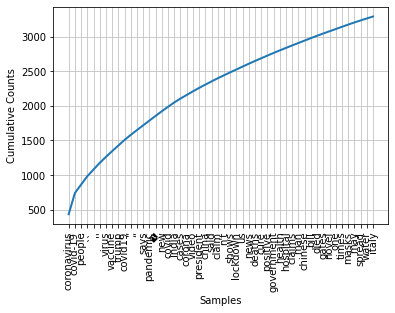

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
# creating frequency distribution --> most common words (key)

what = Text(no_url)

freq_dist = FreqDist(what)

freq_dist.plot(50, cumulative=True)

In [ ]:
key_words = freq_dist.most_common(100)
key_words

[('coronavirus', 436),
 ('covid-19', 304),
 ('people', 123),
 ('’', 121),
 ('``', 97),
 ("''", 95),
 ('virus', 87),
 ('vaccine', 83),
 ('trump', 81),
 ('covid19', 81),
 ('”', 73),
 ('“', 70),
 ('says', 68),
 ('pandemic', 68),
 ('�', 68),
 ('new', 67),
 ('covid', 64),
 ('india', 63),
 ('cases', 56),
 ('corona', 52),
 ('video', 52),
 ('president', 50),
 ('china', 47),
 ('said', 47),
 ('claim', 45),
 ("n't", 43),
 ('shows', 42),
 ('lockdown', 42),
 ('us', 42),
 ('news', 41),
 ('deaths', 40),
 ('cure', 39),
 ('positive', 39),
 ('government', 38),
 ('health', 37),
 ('hospital', 36),
 ('claims', 36),
 ('man', 35),
 ('chinese', 35),
 ('bill', 35),
 ('died', 34),
 ('gates', 33),
 ('novel', 32),
 ('one', 32),
 ('times', 32),
 ('masks', 32),
 ('may', 31),
 ('spread', 29),
 ('water', 29),
 ('italy', 28),
 ('donald', 27),
 ('facebook', 27),
 ('world', 26),
 ('minister', 26),
 ('test', 26),
 ('indian', 26),
 ('due', 26),
 ('would', 25),
 ('social', 25),
 ('time', 25),
 ('doctor', 24),
 ('‘', 24),
 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f4d88f7-58fe-4c32-b979-abb694c94f1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>